In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Carga de CSVs
train_df = pd.read_csv("../Datasets/E-Commerce_train.csv",sep=';',encoding='UTF-8')
test_df = pd.read_csv("../Datasets/E-Commerce_test.csv",sep=';',encoding='UTF-8')

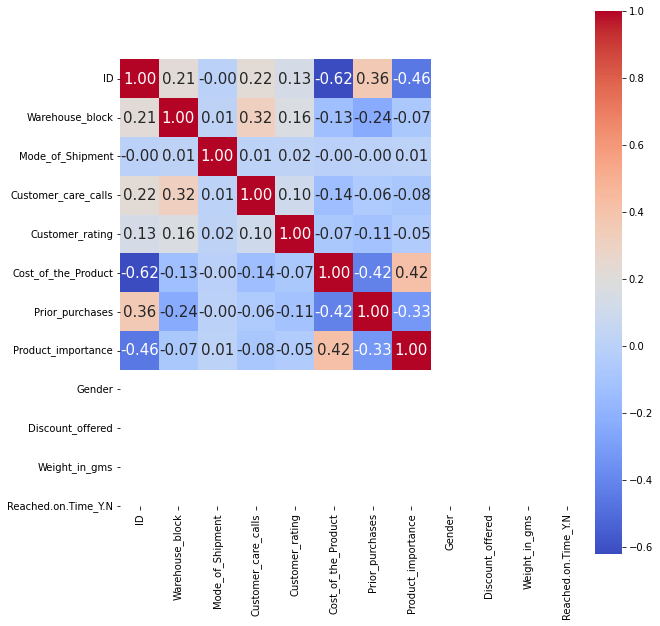

In [4]:
#Indice de correlación
train_df.corr()

# Mapa de calor
import matplotlib.pyplot as plt
import seaborn as sns
corr = train_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= train_df.columns, 
           yticklabels= train_df.columns,
           cmap= 'coolwarm'
           )
plt.show()

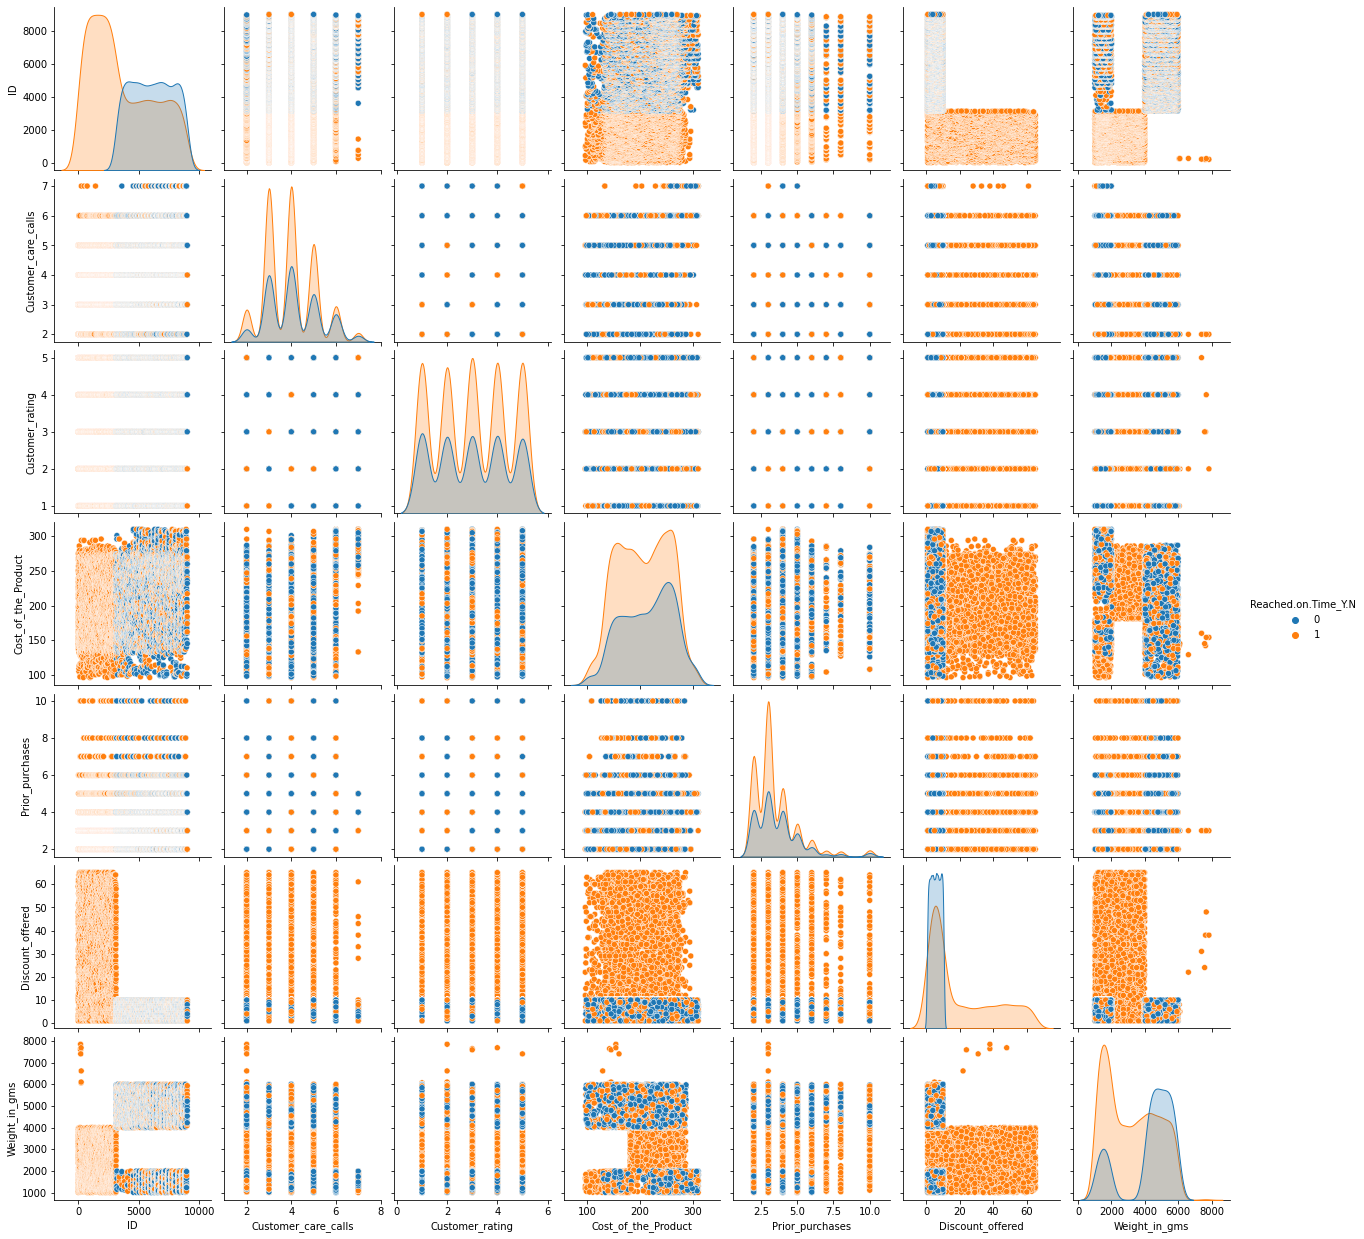

In [5]:
# Veamos cómo se distribuye la variable target con todos los inputs ordinales
sns.pairplot(train_df, hue="Reached.on.Time_Y.N")
plt.show()

In [6]:
train_df.head(4)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1


In [7]:
entrenamiento1 = train_df.loc[:,['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms']]

In [8]:
entrenamiento1

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,4,2,177,3,44,1233
1,4,5,216,2,59,3088
2,2,2,183,4,48,3374
3,3,3,176,4,10,1177
4,2,2,184,3,46,2484
...,...,...,...,...,...,...
8994,3,1,217,3,1,4177
8995,5,3,232,3,3,4526
8996,4,5,260,3,6,4221
8997,4,2,184,3,5,5931


In [9]:
train_df.head(1)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1


In [10]:
from sklearn.tree import DecisionTreeClassifier

# Instanciamos un objeto de la clase DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 3, random_state = 42) 

#dtc = DecisionTreeClassifier(max_depth=4, random_state=42)
#arbol_de_decision = DecisionTreeClassifier(max_depth=4, random_state=53)

In [11]:
# Entrenamos el modelo
clf.fit(entrenamiento1.values,train_df['Reached.on.Time_Y.N'].values)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [12]:
# Exploramos algunas de las características del modelo entrenado. Para pensar, ¿qúe representa cada uno de estos valores?
print(clf.classes_) # array de clases
print(clf.n_classes_) # número de clases (entero)
print(clf.max_features_) # número máximo de carácteristicas ('')
print(clf.feature_importances_) # Cuan importante es cada etiquetas

[0 1]
2
6
[0.         0.         0.00331586 0.07636345 0.8432542  0.07706648]


In [13]:
# Predecimos
y_pred = clf.predict(entrenamiento1.values)

In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(train_df['Reached.on.Time_Y.N'].values,y_pred))

0.7061895766196244


In [55]:
from sklearn.metrics import recall_score
print(recall_score(train_df['Reached.on.Time_Y.N'].values,y_pred))

0.665500961706592


In [15]:
train_df.head(1)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1


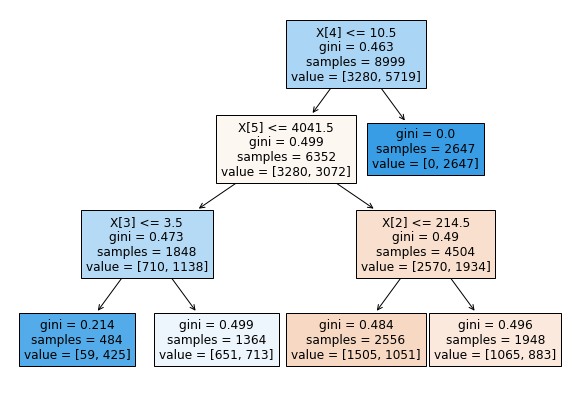

In [16]:
from sklearn import tree
plt.figure(figsize = (10,7))
tree.plot_tree(clf, filled = True)
plt.show()

El Recall para el modelo de arbol de decisión con los inputs ordinales originales ('Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms') es de 0.66
<hr>

2. Encoding campos categóricos

In [17]:
#Codificando los campos categóricos:
#Warehouse_block   Mode_of_Shipment   Product_importance    Gender

In [18]:
#Creando copia del train original
train2_df = train_df.copy()

In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train2_df['Warehouse_block'])
print(list(le.classes_))
train2_df['Warehouse_block'] = pd.DataFrame(le.transform(train2_df['Warehouse_block'],),columns=['Warehouse_block'])

['A', 'B', 'C', 'D', 'F']


In [20]:
le.fit(train2_df['Mode_of_Shipment'])
print(list(le.classes_))
train2_df['Mode_of_Shipment'] = pd.DataFrame(le.transform(train2_df['Mode_of_Shipment'],),columns=['Mode_of_Shipment'])

['Flight', 'Road', 'Ship']


In [21]:
le.fit(train2_df['Product_importance'])
print(list(le.classes_))
train2_df['Product_importance'] = pd.DataFrame(le.transform(train2_df['Product_importance'],),columns=['Product_importance'])

['high', 'low', 'medium']


In [22]:
le.fit(train2_df['Gender'])
print(list(le.classes_))
train2_df['Gender'] = pd.DataFrame(le.transform(train2_df['Gender'],),columns=['Gender'])

['F', 'M']


In [23]:
train2_df.head(1)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1


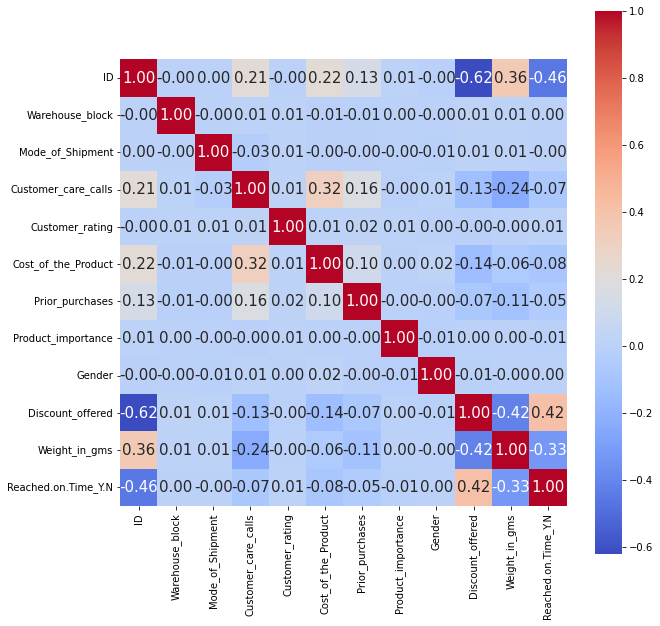

In [24]:
#Indice de correlación nuevamente
train2_df.corr()

# Mapa de calor
import matplotlib.pyplot as plt
import seaborn as sns
corr = train2_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= train_df.columns, 
           yticklabels= train_df.columns,
           cmap= 'coolwarm'
           )
plt.show()

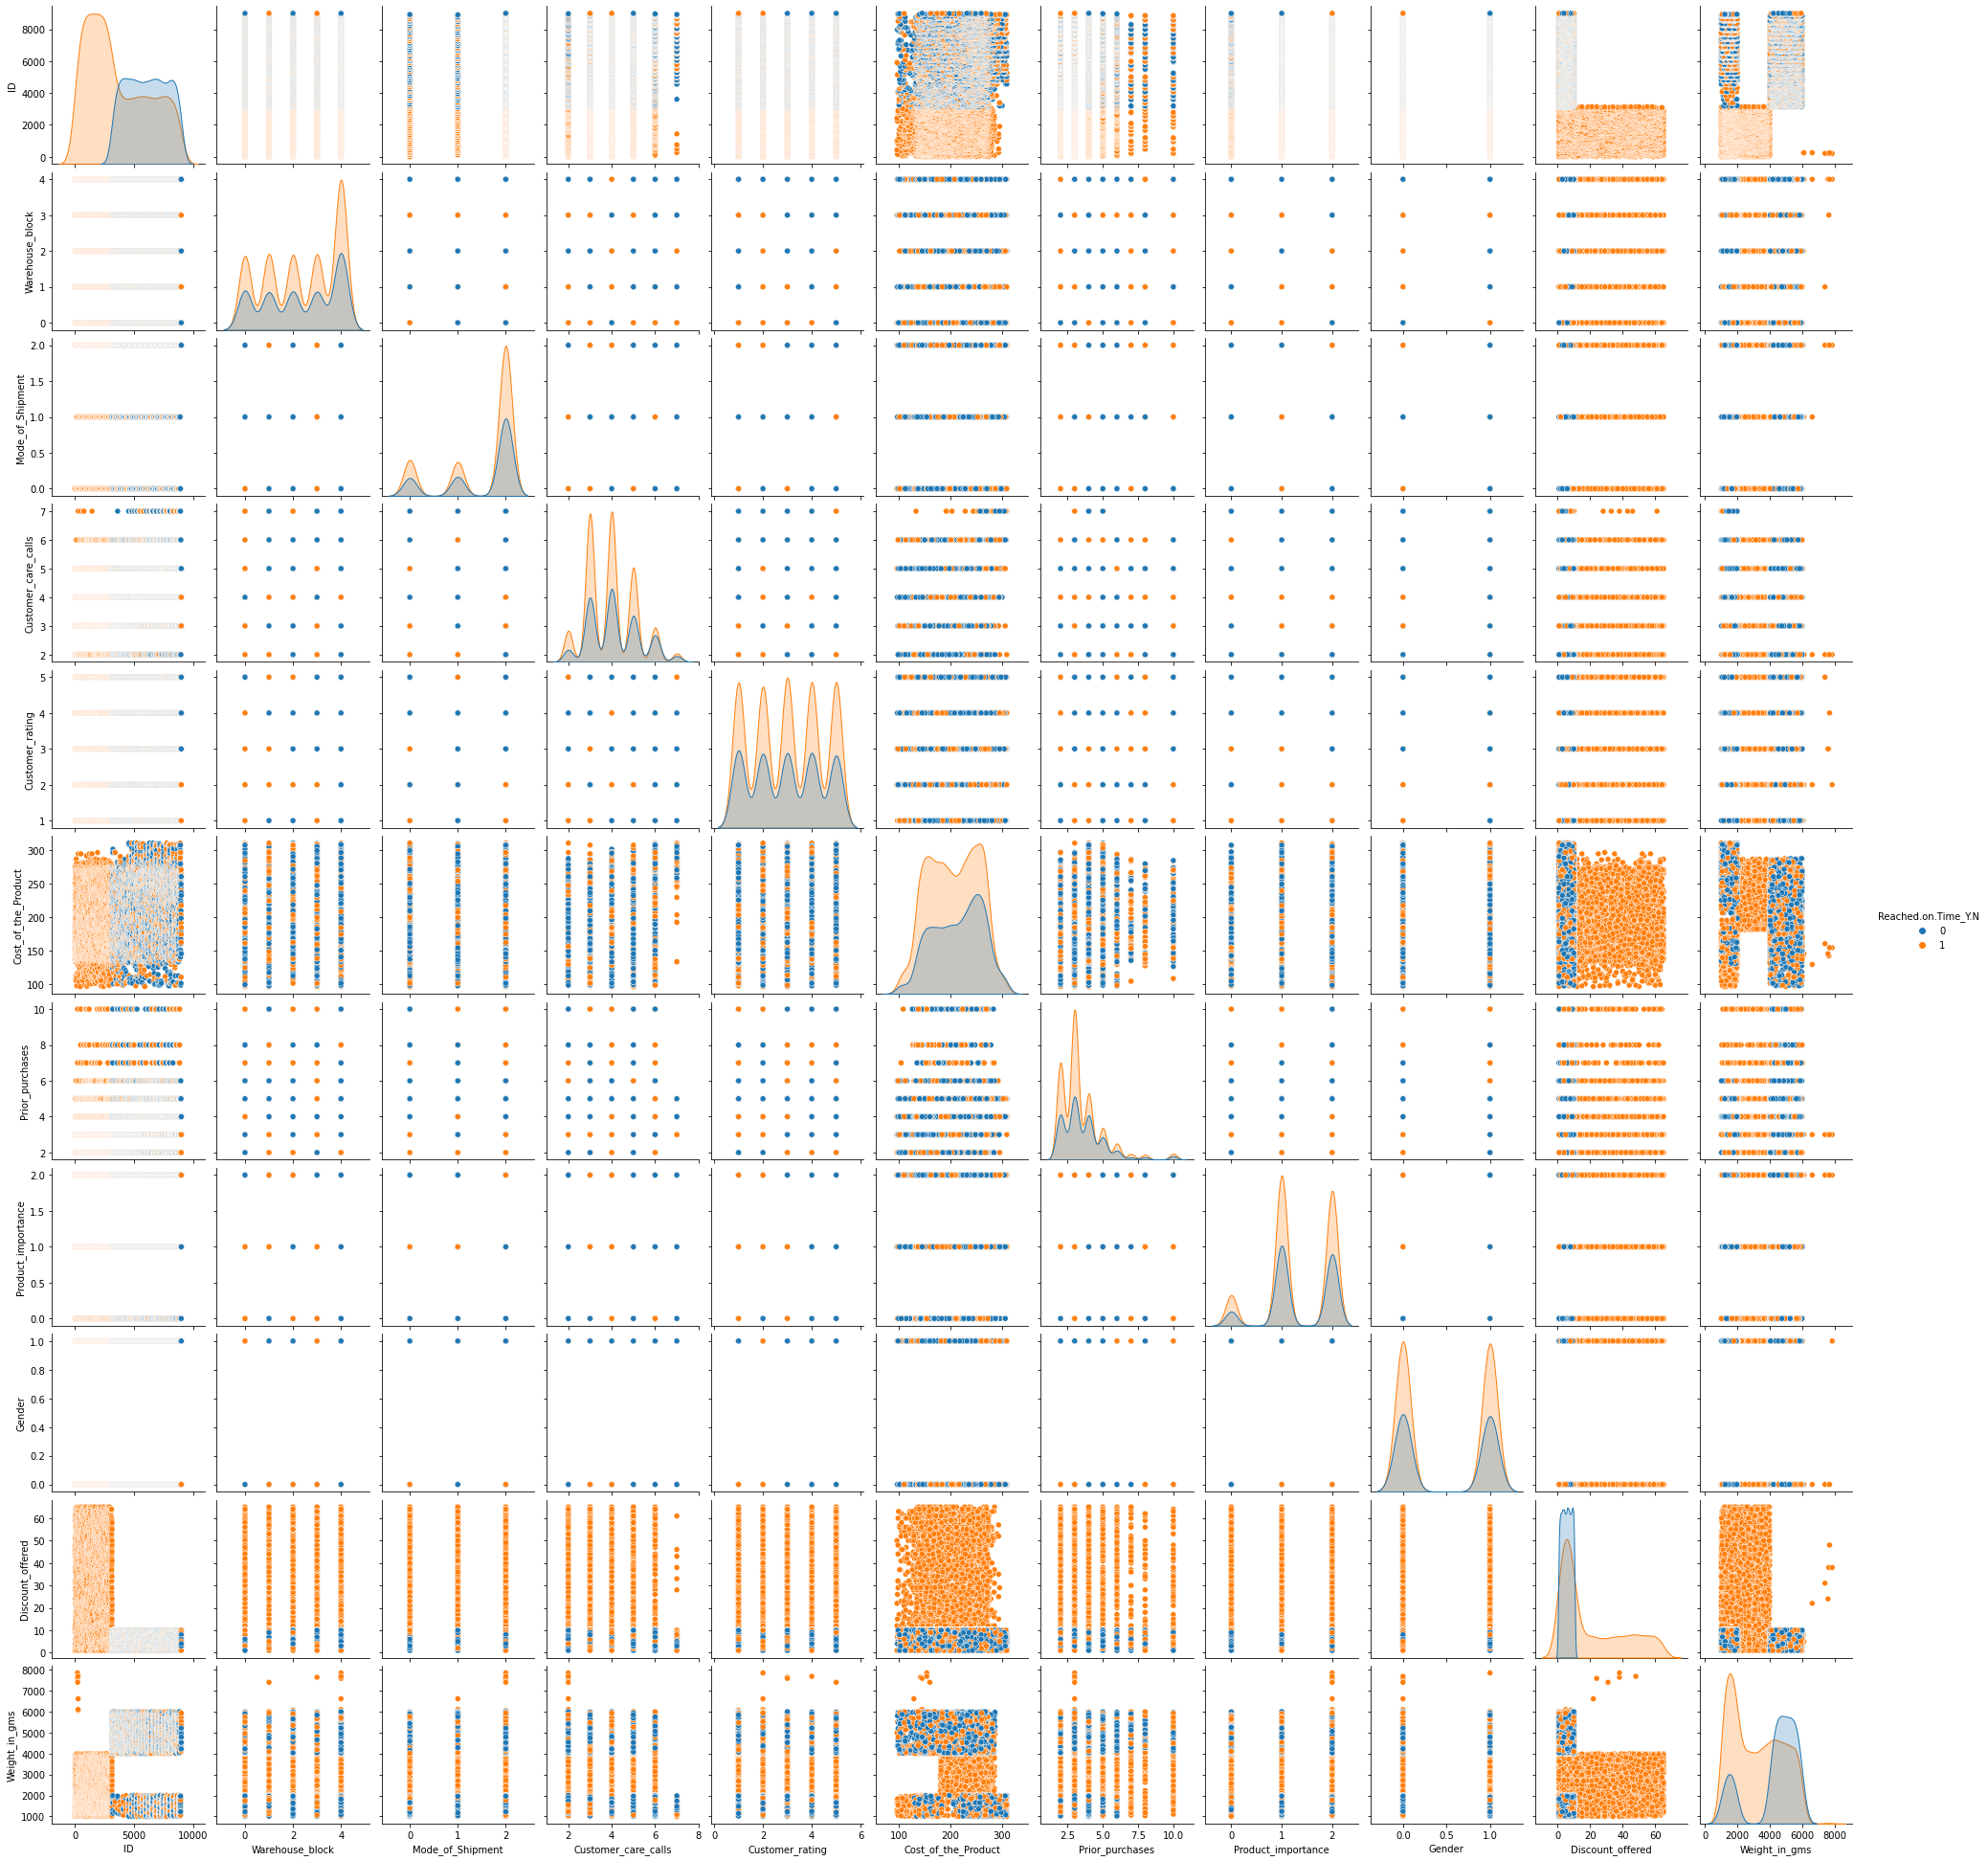

In [25]:
# Veamos cómo se distribuye la variable target con todos los inputs ordinales
sns.pairplot(train2_df, hue="Reached.on.Time_Y.N")
plt.show()

In [58]:
entrenamiento2 = train2_df.iloc[:,1:-1]

In [59]:
entrenamiento2.head(1)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,3,0,4,2,177,3,1,0,44,1233


In [60]:
# Entrenamos el modelo
clf.fit(entrenamiento2.values,train2_df['Reached.on.Time_Y.N'].values)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [61]:
# Exploramos algunas de las características del modelo entrenado. Para pensar, ¿qúe representa cada uno de estos valores?
print(clf.classes_) # array de clases
print(clf.n_classes_) # número de clases (entero)
print(clf.max_features_) # número máximo de carácteristicas ('')
print(clf.feature_importances_) # Cuan importante es cada etiquetas

[0 1]
2
10
[0.         0.         0.         0.         0.00331586 0.07636345
 0.         0.         0.8432542  0.07706648]


Se repite el patrón que asigna como mejor variable predictora a 'Discount_offered'

In [62]:
# Predecimos
y_pred = clf.predict(entrenamiento2.values)
from sklearn.metrics import recall_score
print(recall_score(train_df['Reached.on.Time_Y.N'].values,y_pred))

0.661828991082357


<hr>
Seleccionamos las variables predictoras con mayor magnitud:<br> 
'Discount_offered' 'Weight_in_gms' 'Prior_purchases'

In [63]:
entrenamiento3 = train2_df.loc[:,['Discount_offered','Weight_in_gms','Prior_purchases']]

In [64]:
# Entrenamos el modelo
clf.fit(entrenamiento3.values,train2_df['Reached.on.Time_Y.N'].values)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [65]:
# Exploramos algunas de las características del modelo entrenado. Para pensar, ¿qúe representa cada uno de estos valores?
print(clf.classes_) # array de clases
print(clf.n_classes_) # número de clases (entero)
print(clf.max_features_) # número máximo de carácteristicas ('')
print(clf.feature_importances_) # Cuan importante es cada etiquetas

[0 1]
2
3
[0.84330959 0.08032194 0.07636847]


In [67]:
# Predecimos
y_pred = clf.predict(entrenamiento3.values)
from sklearn.metrics import recall_score
print(recall_score(train_df['Reached.on.Time_Y.N'].values,y_pred))

0.665500961706592


El recall cuando se toman 3 campos mejora, incluso respecto a tomar 10 campos (caso anterior).<hr>

In [69]:
entrenamiento_test = test_df.loc[:,['Discount_offered','Weight_in_gms','Prior_purchases']]

In [70]:
# Predecimos
y_pred_test = clf.predict(entrenamiento_test.values) #Predice valores para la subtabla pred_test

In [71]:
y_pred_test

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [52]:
salida = pd.DataFrame(y_pred_test)

In [54]:
salida.to_csv('salida.csv')